In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
X = df.iloc[:,1:6]
Y = df.charges

In [4]:
X.head()

,sex,bmi,children,smoker,region
0,female,27.900,0,yes,southwest
1,male,33.770,1,no,southeast
2,male,33.000,3,no,southeast
3,male,22.705,0,no,northwest
4,male,28.880,0,no,northwest


In [5]:
regions = pd.get_dummies(X['region'], drop_first = True)
X = X.drop('region', axis = 1)
X = pd.concat([X, regions], axis = 1)

smokers = pd.get_dummies(X['smoker'], drop_first = True)
X = X.drop('smoker', axis = 1)
X = pd.concat([X, smokers], axis = 1)

s = pd.get_dummies(X['sex'], drop_first = True)
X = X.drop('sex', axis = 1)
X = pd.concat([X, s], axis = 1)

#After dummies the X 
X.head()

,bmi,children,northwest,southeast,southwest,yes,male
0,27.900,0,0,0,1,1,0
1,33.770,1,0,1,0,0,1
2,33.000,3,0,1,0,0,1
3,22.705,0,1,0,0,0,1
4,28.880,0,1,0,0,0,1


In [6]:
pca = PCA()

In [7]:
X_reduced = pca.fit_transform(scale(X))

In [8]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 21.93,  40.87,  56.13,  70.42,  83.84,  95.51, 100.  ])

In [9]:
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)
regr = LinearRegression()
mse = []

In [10]:
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), Y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


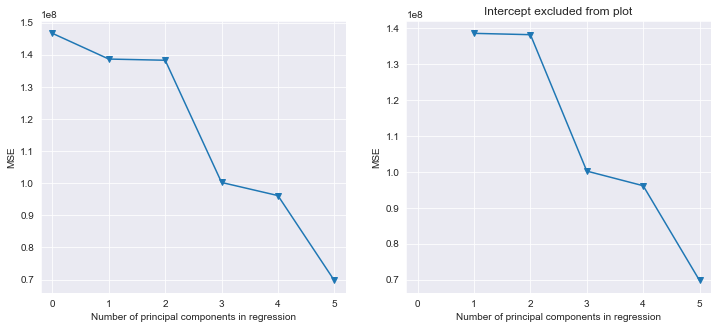

In [11]:
for i in np.arange(1,6):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], Y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[1:6], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

In [12]:
X_new = pd.DataFrame(X_reduced)

In [13]:
X_new.head()

,0,1,2,3,4,5,6
0,-0.451386,1.670650,0.402051,-1.606338,1.747150,0.904334,-0.373852
1,1.767925,-0.408360,0.056887,0.140578,-0.900130,-0.773131,-0.311336
2,1.636602,-0.374951,0.595615,1.592234,-0.409280,-1.110215,-0.302381
3,-1.729482,-1.394247,0.283252,-0.917163,-1.087760,-0.573122,-0.458395
4,-1.243194,-1.341320,0.240240,-0.660219,-1.403845,0.203187,-0.330314


In [14]:
# copy the data
Y = Y.copy()
  
# apply normalization techniques
for i in Y:
    Y = Y / Y.abs().max()
    
Y.head()

0    0.264777
1    0.027059
2    0.069773
3    0.344744
4    0.060637
Name: charges, dtype: float64

In [15]:
X_new = X_new.copy()
  
# apply normalization techniques
for column in X_new.columns:
    X_new[column] = X_new[column] / X_new[column].abs().max()
    
X_new.head()

,0,1,2,3,4,5,6
0,-0.124652,0.815774,0.139585,-0.420006,0.518882,0.287940,-0.271420
1,0.488219,-0.199401,0.019750,0.036757,-0.267328,-0.246165,-0.226033
2,0.451954,-0.183087,0.206787,0.416319,-0.121551,-0.353493,-0.219531
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052,-0.182482,-0.332799
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925,0.064695,-0.239811


In [16]:
new_df = pd.concat([X_new, Y], axis = 1)
new_df.head()

,0,1,2,3,4,5,6,charges
0,-0.124652,0.815774,0.139585,-0.420006,0.518882,0.287940,-0.271420,0.264777
1,0.488219,-0.199401,0.019750,0.036757,-0.267328,-0.246165,-0.226033,0.027059
2,0.451954,-0.183087,0.206787,0.416319,-0.121551,-0.353493,-0.219531,0.069773
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052,-0.182482,-0.332799,0.344744
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925,0.064695,-0.239811,0.060637


In [88]:
X = X_new
Y = new_df['charges']

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.1, random_state = 21 )

In [90]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# performance for training set:
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 0.11075871310277069
R2 score is 0.6590001726384067


The model performance for testing set:


RMSE is 0.1043637143969986
R2 score is 0.7014046324089548


<function matplotlib.pyplot.show(*args, **kw)>

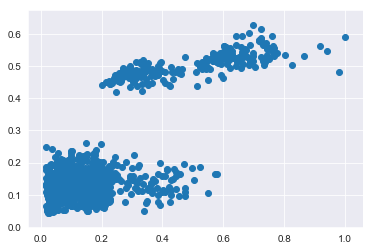

In [92]:
plt.scatter(Y_train,y_train_predict)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

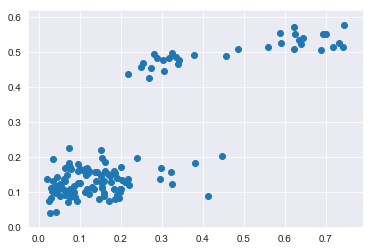

In [93]:
plt.scatter(Y_test,y_test_predict)
plt.show